<a href="https://colab.research.google.com/github/lili-hdz/inteligencia_artificial/blob/main/CNN%20/%20Clasificaci%C3%B3n_de_ropa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ejercicio: Clasificación de ropa

Practica de redes neuronales /  Red neuronal convolucional (CNN)

---
Liliana Patricia Hernandez Cruz

Construiremos una red neuronal convolucional para clasificar imagenes utilizando la base de datos Fashion MNIST y desarrollada en TensorFlow.

El dataset Fashion MNIST es un conjunto de datos de imágenes utilizado comúnmente para entrenar y evaluar algoritmos de aprendizaje automático, especialmente en tareas de clasificación de imágenes. Fue creado por la compañía de tecnología alemana Zalando

El conjunto contiene 70,000 imágenes en escala de grises de 28x28 píxeles entiquetados en 10 categorías diferentes de artículos de moda. Las categorias son: T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag y Ankle boot

In [2]:
import numpy as np #Importo las librerías necesarias
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Softmax
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

Fashion MNIST Dataset

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
#Cargo el conjunto de datos

In [4]:
fashion_mnist.load_data #Visualizo los detalles de la BD

<function keras.src.datasets.fashion_mnist.load_data()>

Tambien podemos ver la referencia de conjunto de datos en la siguiente url: https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
               #Defino las clases que voy a ocupar

#Preprocesamiento de datos

Este dataset no es necesario utilizar una función para obtener el conjuto de entrenamiento y de prueba, el conjunto ya viene dividido por default.

In [6]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


#Visualización de una imagen

In [7]:
index = 10
#Es necesario para elegir la imagen que quieras

In [8]:
image = train_images[index]
label = train_labels[index]
#Muestra la imagen y su etiqueta

In [9]:
print(image)
#Imprime la matríz númerica de la imagen

[[  0   0   0   0   0   0   0  11 142 200 106   0   0   0   0   0   0   0
   85 185 112   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 152 214 217 194 236 216 187 149 135 153 211 217
  231 205 217 188  34   0   0   0   0   0]
 [  0   0   0   0   0  66 185 166 180 181 190 211 221 197 146 198 206 191
  168 190 172 188 175   0   0   0   0   0]
 [  0   0   0   0   0 135 153 160 175 180 170 186 187 190 188 190 187 174
  195 185 174 161 175  59   0   0   0   0]
 [  0   0   0   0   0 161 147 160 170 178 177 180 168 173 174 171 185 184
  185 172 171 164 174 120   0   0   0   0]
 [  0   0   0   0   2 175 146 145 168 178 181 185 180 184 178 179 187 191
  193 190 181 171 172 158   0   0   0   0]
 [  0   0   0   0  35 177 155 140 151 172 191 187 186 187 186 187 182 191
  194 188 180 161 161 185   0   0   0   0]
 [  0   0   0   0  59 170 153 141 120 154 160 161 172 168 166 161 165 172
  170 164 139 149 162 166  21   0   0   0]
 [  0   0   0   0  79 145 160 214 123 128 153 160 164 158 157 15

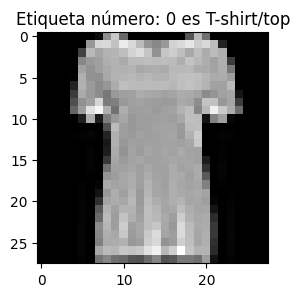

In [10]:
plt.figure(figsize=(3, 3))
plt.imshow(image, cmap=plt.cm.gray)
plt.title(f'Etiqueta número: {label} es {class_names[label]}')
plt.show()
#Mostramos la imagen con matplotlib

#Preprocesamiento de datos

In [13]:
print(train_images.shape)
print(test_images.shape)
#Muestra cuantos datos hay y cada una tiene 28x28

(60000, 28, 28)
(10000, 28, 28)


In [14]:
# Normalizar las imágenes para que los valores estén en el rango [0, 1], porque los valores se dividen entre 255
#Esto se usa para escalar los datos y que sea más fácil hacer operaciones con números pequeños
train_images = train_images / 255.0
test_images = test_images / 255.0

#Red neuronal convolucional

In [16]:
# Crear el modelo de CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10)
])
#El 32 es que va a haber 32 convoluciones de forma vertical
#El kernel es el (3,3) que sería de el filtro de 3x3
#Flatten aplana la matriz

compilar el modelo

In [17]:
# Tasa de aprendizaje deseada
learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)
#Usamos de optimizador a Adam

In [18]:
model.compile(optimizer=adam_optimizer,
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#Entrenar el modelo

In [19]:
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels)) #Entrenamos con el (.fit) y el valor de las épocas

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 35ms/step - accuracy: 0.7569 - loss: 0.6739 - val_accuracy: 0.8611 - val_loss: 0.3687
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 42ms/step - accuracy: 0.8792 - loss: 0.3304 - val_accuracy: 0.8808 - val_loss: 0.3193
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 32ms/step - accuracy: 0.8975 - loss: 0.2766 - val_accuracy: 0.8926 - val_loss: 0.2956
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 109s 47ms/step - accuracy: 0.9102 - loss: 0.2406 - val_accuracy: 0.8938 - val_loss: 0.2930
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9196 - loss: 0.2122 - val_accuracy: 0.9035 - val_loss: 0.2655
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - accuracy: 0.9271 - loss: 0.1955 - val_accuracy: 0.9090 - val_loss: 0.2577
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 71s 38ms/step - accuracy: 0.9355 - loss: 0.1718 - val_accuracy: 0.9047 - val_loss: 0.2735
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9395 

#Evaluación

In [21]:
# Evaluar el modelo
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
#Se obtienen la pérdida y la precisión del modelo en los datos de prueba

313/313 - 3s - 9ms/step - accuracy: 0.9088 - loss: 0.2883


#Predicciones

In [22]:
probability_model = Sequential([model, Softmax()])
predictions = probability_model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


#Calcular la matriz de confusión

In [23]:
# Calcular matriz de confusión
#Se calculan las predicciones del modelo en el conjunto de prueba y se obtienen las clases previstas
cm = confusion_matrix(test_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

Visualizar la matriz de confusión y mostrar la sensibilidad para cada clase

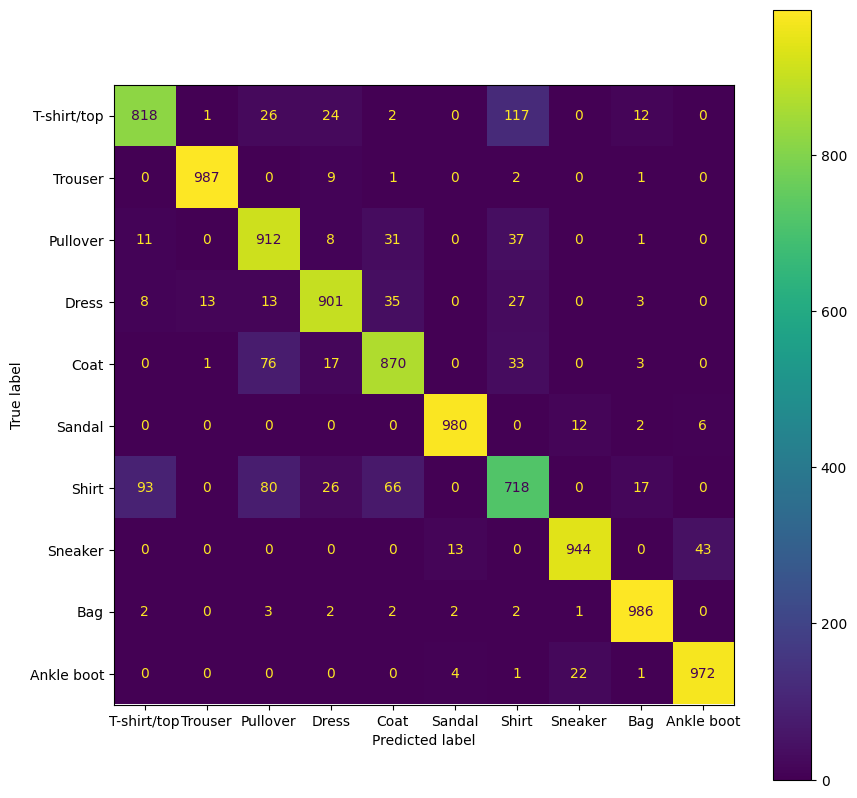

In [24]:
# Graficar matriz de confusión
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax)
plt.show()

#BONUS:
Codigo para graficar una imagen con su etiqueta predicha

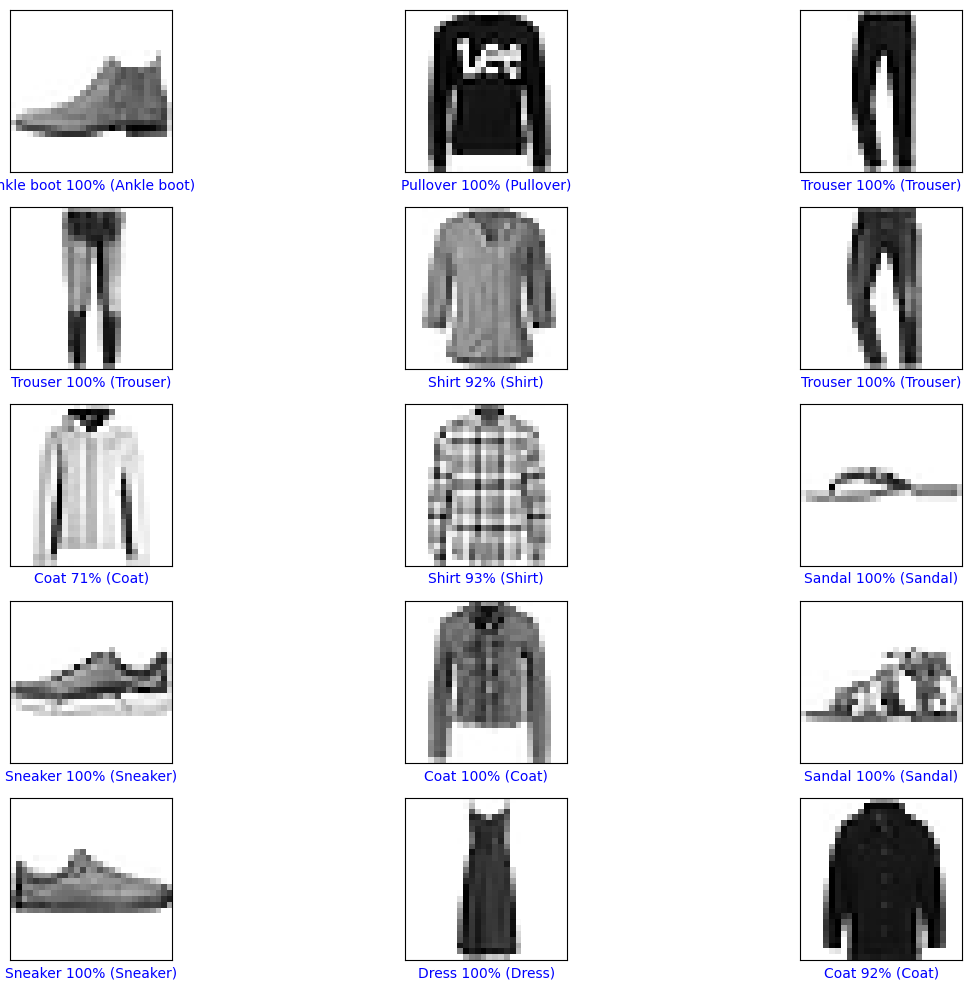

In [25]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img.reshape((28, 28)), cmap=plt.cm.binary)

    predicted_label = tf.argmax(predictions_array).numpy()
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*tf.reduce_max(predictions_array).numpy(),
                                         class_names[true_label]),
                                         color=color)

# Graficar algunas predicciones
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)

plt.tight_layout()
plt.show()